# Sentimental Analysis on Google News (Taliban)

Importing libraries

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Installing GoogleNews

In [174]:
!pip install GoogleNews

In [175]:
from GoogleNews import GoogleNews
googlenews = GoogleNews()
googlenews.set_lang('en')

Selecting News on "Taliban"

In [176]:
# Get last 11 Months Talibans google news
googlenews.get_news('taliban')  
googlenews.set_time_range('01/01/2021','11/17/2021')

News Results: 

In [177]:
results=googlenews.results()
results

[{'date': '23 hours ago',
  'datetime': datetime.datetime(2021, 11, 16, 11, 0, 31, 212233),
  'desc': 'bookmark_border',
  'img': 'https://lh3.googleusercontent.com/proxy/ZWbKM6SKAvXf7r42DaJhHh4U4_Z4lD3SdKjfvh6EyujuuapCGIR8yT3u6yTm4jPvHMnR52-yqUfe7R8YjrfZSikWxrTlOQ25V03u8EQ=s0-w100-h100-dcKQOEcc0D',
  'link': 'news.google.com/./articles/CAIiEJ_eAM2axRvsBMhyGeIuaPsqGAgEKg8IACoHCAow1tzJATDnyxUww8rPBg?uo=CAUiANIBAA&hl=en-US&gl=US&ceid=US%3Aen',
  'media': None,
  'site': 'The Wall Street Journal',
  'title': 'Afghanistan’s Shiite Minority Cautiously Embraces Taliban Rule, Seeking Protection'},
 {'date': 'Yesterday',
  'datetime': None,
  'desc': 'bookmark_border',
  'img': 'https://lh3.googleusercontent.com/proxy/e2-TkXkIBcu3h8_b5reTF3TcnJGXM1C2bz7N0Ob_RsNr-HGh-yoqELoVoSzHgTmOGIeASkVRIanDWbzjb6JZ9t0G2DITx6AeaeMsz0YhzLBlf-bDAx1q4Uvq3Db1hiNPvaZk2ana-hecl_H8FjhYbqhpP0jhkd_WyEcbUbjaOX4d7Ak7F4vwRDdElTAAvBRRUGINDIo7JW2in8SeQYWEXJhEvsG29xj1QnpLSFZ4fNvt2tpY5JHWGGPw6XWJr_FwV6vuWMoqSZYuKaqx3rAnxLsm

Getting News headlines

In [178]:
headlines=googlenews.get_texts()
headlines

['Afghanistan’s Shiite Minority Cautiously Embraces Taliban Rule, Seeking Protection',
 'Taliban hold military parade with US-made weapons in Kabul in show of strength',
 'Why some young men who were born after the Sept. 11 attacks have joined the Taliban',
 'Zalmay Khalilzad Battles Critics in U.S. and Afghanistan',
 'When the Taliban Are in Your Bedroom',
 'Addressing Afghanistan’s Crisis Will Require Dealing With the Taliban',
 'What Life Is Like Under the Afghan Taliban',
 'ISIS Poses a Growing Threat to New Taliban Government in Afghanistan',
 'Opinion | The Taliban Is Vulnerable. Here’s How to Seize the Moment',
 'Should the U.S. Want the Taliban to Succeed?',
 'The Taliban is back -- Afghan women are scared, but defiant',
 "Taliban won't be allowed access to Afghan central bank reserves -Adeyemo",
 'In Kabul clinic, Taliban and the soldiers they fought confront wounds of war',
 'Imran Khan Seals Deal With the Tehreek-i-Taliban Pakistan',
 'Taliban says failure to recognise their

In [179]:
columns = [ 'Headline']
NewsHeadlines = pd.DataFrame(headlines, columns=columns)
NewsHeadlines

,Headline
0,Afghanistan’s Shiite Minority Cautiously Embra...
1,Taliban hold military parade with US-made weap...
2,Why some young men who were born after the Sep...
3,Zalmay Khalilzad Battles Critics in U.S. and A...
4,When the Taliban Are in Your Bedroom
...,...
89,"To reach a peace deal, Taliban say Afghan pres..."
90,Afghan women fear return to 'dark days' amid T...
91,Afghan official Q&A: What next amid new Taliba...
92,"After Two Decades of Fighting Taliban, U.S. Is..."


Removing Stop words form the headlines

In [180]:
## remove stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
NewsHeadlines['Headline'][2]

'Why young men born Sept. 11 attacks joined Taliban'

removing Punctuations:

In [181]:
## remove punctuation
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].str.replace('[^\w\s]','')

In [182]:
most = pd.Series(' '.join(NewsHeadlines['Headline']).split()).value_counts()[:10]
most

Taliban         79
Afghanistan     26
Afghan          18
US              16
The              9
What             8
With             6
Afghanistans     5
Talibans         5
women            5
dtype: int64

In [183]:
most = list(most.index)
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join(x for x in x.split() if x not in most))
NewsHeadlines['Headline'].head()

0    Shiite Minority Cautiously Embraces Rule Seeki...
1    hold military parade USmade weapons Kabul show...
2            Why young men born Sept 11 attacks joined
3                     Zalmay Khalilzad Battles Critics
4                                When Are Your Bedroom
Name: Headline, dtype: object

In [184]:
from textblob import TextBlob
TextBlob(NewsHeadlines['Headline'][1]).words

WordList(['hold', 'military', 'parade', 'USmade', 'weapons', 'Kabul', 'show', 'strength'])

In [185]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
NewsHeadlines['Headline'] = NewsHeadlines['Headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [186]:
NewsHeadlines['Headline'][4]

'when are your bedroom'

wordcoud

In [187]:


from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

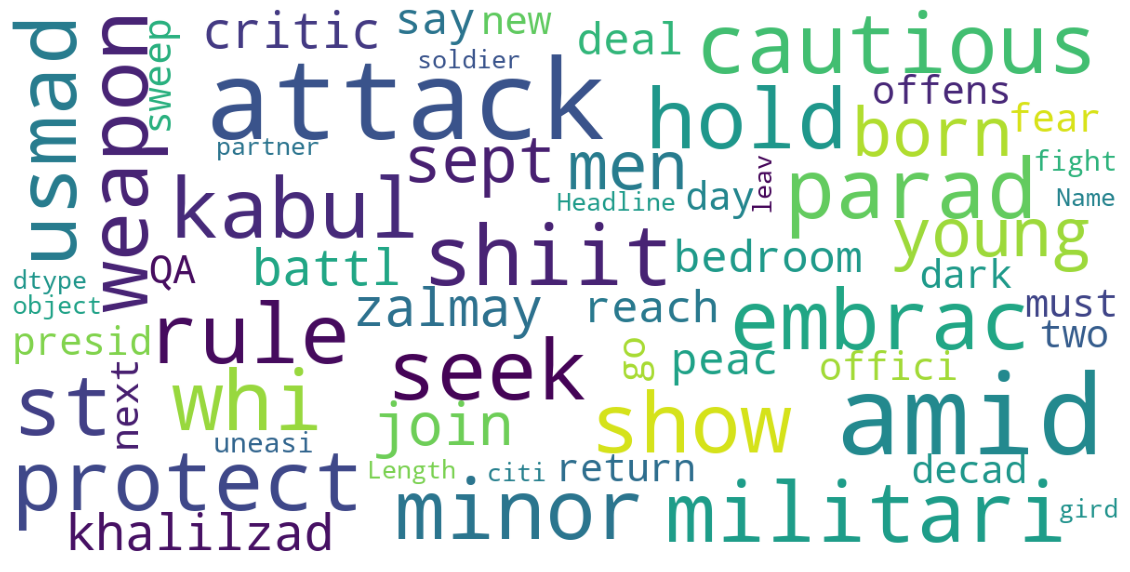

In [188]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=800,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=24)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(NewsHeadlines['Headline'])

Importing Sentiment Analyzer

In [189]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [190]:
analyzer = SentimentIntensityAnalyzer()

In [191]:
# Use polarity_scores method of Sentiment Intensity Analyzer to get sentiment scores
sentiment_scores = NewsHeadlines['Headline'].apply(analyzer.polarity_scores).tolist() # results contains pos, neg, neu, and compound scores.

Sentiment Scores:

In [192]:
sentiment_scores = pd.DataFrame(sentiment_scores)
print("Overall sentiment dictionary is :\n  ")
print(sentiment_scores)

Overall sentiment dictionary is :
  
      neg    neu    pos  compound
0   0.156  0.556  0.289    0.2960
1   0.193  0.526  0.281    0.2500
2   0.274  0.531  0.195   -0.2263
3   0.412  0.588  0.000   -0.2732
4   0.000  1.000  0.000    0.0000
..    ...    ...    ...       ...
89  0.000  0.864  0.136    0.0258
90  0.390  0.610  0.000   -0.4939
91  0.000  1.000  0.000    0.0000
92  0.271  0.729  0.000   -0.3818
93  0.383  0.617  0.000   -0.4767

[94 rows x 4 columns]


In [193]:
sentiment_value=[] 
 # decide sentiment as positive, negative and neutral
for i in  sentiment_scores['compound']:
   
    if  i >= 0.05  :
        sentiment_value.append( "Positive")
 
    elif i  <= - 0.05 :
        sentiment_value.append( "Negative")
 
    else :
        sentiment_value.append("Neutral")

In [194]:
NewsHeadlines['Sentiment value']=(sentiment_value)
NewsHeadlines

,Headline,Sentiment value
0,shiit minor cautious embrac rule seek protect,Positive
1,hold militari parad usmad weapon kabul show st...,Positive
2,whi young men born sept 11 attack join,Negative
3,zalmay khalilzad battl critic,Negative
4,when are your bedroom,Neutral
...,...,...
89,To reach peac deal say presid must go,Neutral
90,fear return dark day amid sweep,Negative
91,offici QA next amid new offens,Neutral
92,after two decad fight Is uneasi partner them,Negative


In [195]:
NewsHeadlines['senti_score'] = NewsHeadlines['Headline'].apply(senti)
NewsHeadlines.senti_score.head()

0    (-0.05, 0.2)
1      (0.0, 0.0)
2      (0.1, 0.4)
3      (0.0, 0.0)
4      (0.0, 0.0)
Name: senti_score, dtype: object